In [471]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

In [472]:
import pickle
import numpy as np
import PIL.Image
import itertools
from IPython.core.display import Image, display
import scipy.ndimage
import random
import numpy as np
import matplotlib.pylab as plt
#import tqdm
import math
%matplotlib inline

In [473]:
with open('./hw_1_train.pickle', 'rb') as f:
    train = pickle.load(f)

with open('./hw_1_test_no_lables.pickle', 'rb') as f:
    test_no_lables = pickle.load(f)


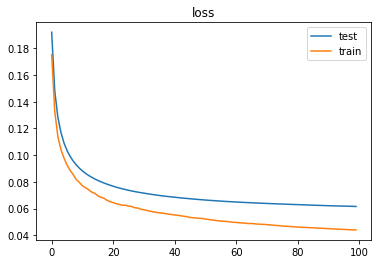

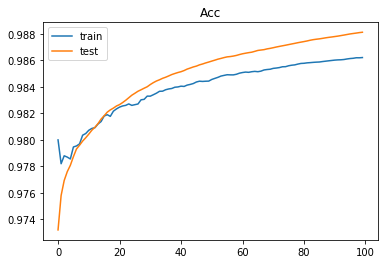

In [512]:
test_l = 0
train_l = 0
graf2 = []
graf1 = []
graf3 = []
graf4 = []
s = 0
sum = 0
sumT = 0
X = np.hstack([ np.ones((train['data'].shape[0], 1)), train['data']] )
mean = np.mean(X, axis=0)        #Нормировка
std = np.std(X, axis=0)
X = (X - mean) / (std+0.00001)
x_train, x_test, y_train, y_test= train_test_split(X,train['labels'],random_state=11)
np.random.seed(11)
w = np.random.normal(scale=0.001, size = X.shape[1])
for k in range(100):
    for i in range(x_test.shape[0]):
            j = np.random.randint(0, x_train.shape[0])
            grad = - (y_train[j]*2-11) * (x_train[j]) / \
                ( 1 + math.exp( (y_train[j]*2-11) * np.dot(w.T, x_train[j]) ) ) + 0 * w
            w = w - 0.0004* grad
            train_l += math.log( 1 + math.exp( -(y_train[j]*2-11) * np.dot(w.T, x_train[j]) ) )
            test_l += math.log( 1 + math.exp( -(y_test[i]*2-11) * np.dot(w.T, x_test[i]) ) )
            s+=1
            if ((1. / (1 + math.exp(-np.dot(w.T,x_train[j]))))>= 0.5 and y_train[j] == 6) or ((1. / (1 + math.exp(-np.dot(w.T,x_train[j]))))< 0.5 and y_train[j] == 5):
                sum += 1
                
            if ((1. / (1 + math.exp(-np.dot(w.T,x_train[i]))))>= 0.5 and y_train[i] == 6) or ((1. / (1 + math.exp(-np.dot(w.T,x_train[i]))))< 0.5 and y_train[i] == 5):
                sumT += 1          
                
    graf1.append(test_l/s)   #loss
    graf2.append(train_l/s)
    graf3.append(sum/s) #train accuracy
    graf4.append(sumT/s)   #test accuracy
    
plt.title('loss')
plt.plot(graf1, label = 'test')
plt.plot(graf2, label = 'train')
plt.legend()
plt.show()

plt.title('Acc')
plt.plot(graf3, label = 'train')
plt.plot(graf4, label = 'test')
plt.legend()

In [506]:
Y = np.hstack([ np.ones((test_no_lables['data'].shape[0], 1)), test_no_lables['data']] )
mean = np.mean(Y, axis=0)
std = np.std(Y, axis=0)
Y = (Y - mean) / (std+0.00001)
with open('solution.csv', 'w') as fout:
    print("Id,Prediction", file=fout)
    for i in range(Y.shape[0]):
        print(i, (1. / (1 + math.exp(-np.dot(w.T,Y[i])))), sep=',', file=fout)

In [511]:
l=0
train_list = []
test_list = []
l_test = 0
for i in range(x_train.shape[0]):
    l += math.log(1+math.exp( -(y_train[i]*2-11) * np.dot(w.T, x_train[i]) ))

print(l/x_train.shape[0])


for i in range(x_test.shape[0]):
    l_test += math.log(1+math.exp( -(y_test[i]*2-11) * np.dot(w.T, x_test[i]) ))
print(l_test/x_test.shape[0])

0.03578541566894988
0.05557698694291703
